# Initial EDA of initial data download

In [1]:
from datetime import date
import gzip
import json
from pathlib import Path

import arrow
import pandas as pd
import seaborn as sns

In [2]:
input_dir = Path("../data/raw/20210527_initial_data_children_biography/")

In [3]:
genres = ["children", "history_biography"]

## Plot ratings distribution by genre

In [4]:
def load_ratings(genres):
    for genre in genres:
        input_file = input_dir / f"goodreads_interactions_{genre}.json.gz"
        with gzip.open(input_file, "rt") as fin:
            for i, line in enumerate(fin):
                # if i > 999:
                #    break
                j = json.loads(line)
                if j["rating"] > 0:
                    d = arrow.get(j["date_updated"], "ddd MMM DD HH:mm:ss Z YYYY").date()
                    first_day_month = date(year=d.year, month=d.month, day=1)
                    yield j["user_id"], j["book_id"], first_day_month, genre, j["rating"]

In [5]:
rating_df = pd.DataFrame(load_ratings(genres), columns=["user_id", "book_id", "month", "genre", "rating"])

<AxesSubplot:xlabel='rating', ylabel='Count'>

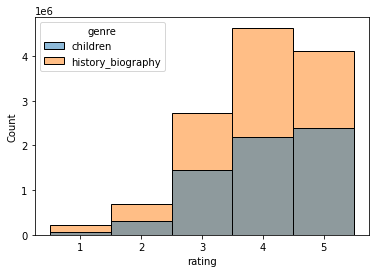

In [6]:
sns.histplot(rating_df, x="rating", hue="genre", discrete=True)

Labeling ratings $\leq 3$ as negative and $> 3$ as positive might be a first thing to try. 

## Plot ratings over time

## Plot (cumulative) distribution of rating count for books and users 